In [10]:
import xmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
import Tools


Binospec=ascii.read("../../A-Catalogs/Binospec-Candels.cat")
Fresco=ascii.read("Ha_fresco_GN_v2.csv")
Congress=ascii.read("Ha_congress_v2.csv")

In [26]:
82-22

60

In [41]:
count=0

for gal in Binospec:
    if (gal["zsys"]>0 or gal["z"]>0) and (gal["FluxLim"]<0 or gal["LyaFlux"]<0) :
        count+=1
print(count)

104


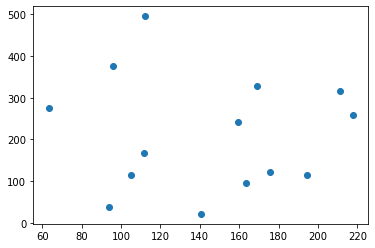

In [42]:
plt.scatter(Binospec["LyaFWHM"],Binospec["voff"])

In [5]:
for gal in Binospec:
    if gal["id_charlotte"]=="Stark11_42_13066":
        gal["fesc"]=np.nan

nan


In [ ]:
ascii.write(Binospec,"../../A-Catalogs/Binospec-Candels.cat",overwrite=True)

In [75]:
idx,dist2d=xmatch.xmatch(Binospec['ra_candels'],Binospec['dec_candels'],Fresco['ra'],Fresco['dec'])
mask2d=xmatch.Filter_separation(dist2d,0.3/3600)

Bino_Fresco=Binospec[mask2d]
Fresco_Bino=Fresco[idx[mask2d]]


Bino_z=Bino_Fresco["zsys"]
Fresco_z=Fresco_Bino["z_map"]
mask_to_crosscheck = np.isnan(Bino_z) ^ (np.abs(Bino_z - Fresco_z) >= 0.05)

Bino_crosscheck=Bino_Fresco[mask_to_crosscheck]
Fresco_crosscheck=Fresco_Bino[mask_to_crosscheck]

for i in range(0,len(Bino_crosscheck)):
    if Fresco_crosscheck[i]["q_final"]>1.75:
        print("Bino ID | zlya | zphot | zsys")
        print(Bino_crosscheck[i]["id_charlotte"],Bino_crosscheck[i]["z"],Bino_crosscheck[i]["photoz"],Bino_crosscheck[i]["zsys"])
        print("Fresco ID | zHa | q_final")
        print(Fresco_crosscheck[i]["id"],Fresco_crosscheck[i]["z_map"],Fresco_crosscheck[i]["q_final"])
        print("Voff")
        print(Tools.vOffset(Bino_crosscheck[i]["z"],Fresco_crosscheck[i]["z_map"]))
        print("   ")

Bino ID | zlya | zphot | zsys
z6_GNW_11543 5.769585403180398 5.7 nan
Fresco ID | zHa | q_final
32735 5.611 3.0
Voff
7191.454821112164
   
Bino ID | zlya | zphot | zsys
z6_GND_36553 5.610946246224566 5.72 nan
Fresco ID | zHa | q_final
29820 5.606 2.0
Voff
224.46977195518974
   
Bino ID | zlya | zphot | zsys
z6_GND_32408 nan 6.0 nan
Fresco ID | zHa | q_final
26982 5.608 2.0
Voff
nan
   
Bino ID | zlya | zphot | zsys
z5_GND_7766 5.5912848204122305 5.58 nan
Fresco ID | zHa | q_final
3869 5.591 3.0
Voff
12.955092015035989
   
Bino ID | zlya | zphot | zsys
z5_GND_13996 nan 5.51 6.01536418811046
Fresco ID | zHa | q_final
10648 6.315 3.0
Voff
nan
   
Bino ID | zlya | zphot | zsys
z5_GND_23860 6.584699244519547 5.29 nan
Fresco ID | zHa | q_final
20071 5.092 2.25
Voff
73456.98876711396
   
Bino ID | zlya | zphot | zsys
z5_GND_10047 6.010827192429243 5.5 nan
Fresco ID | zHa | q_final
6732 5.194 3.0
Voff
39534.813009299614
   
Bino ID | zlya | zphot | zsys
z5_GND_28693 nan 5.23 nan
Fresco ID | zHa

In [80]:
idx, dist2d = xmatch.xmatch(Binospec['ra_candels'], Binospec['dec_candels'], Congress['ra'], Congress['dec'])
mask2d = xmatch.Filter_separation(dist2d, 0.3 / 3600)

Bino_Congress = Binospec[mask2d]
Congress_Bino = Congress[idx[mask2d]]

Bino_z = Bino_Congress["zsys"]
Congress_z = Congress_Bino["z_map"]
mask_to_crosscheck = np.isnan(Bino_z) ^ (np.abs(Bino_z - Congress_z) >= 0.05)

Bino_crosscheck = Bino_Congress[mask_to_crosscheck]
Congress_crosscheck = Congress_Bino[mask_to_crosscheck]

for i in range(0, len(Bino_crosscheck)):
    if Congress_crosscheck[i]["q"] > 1.75:
        print("Bino ID | zlya | zphot | zsys")
        print(Bino_crosscheck[i]["id_charlotte"], Bino_crosscheck[i]["z"], Bino_crosscheck[i]["photoz"], Bino_crosscheck[i]["zsys"])
        print("Congress ID | zHa | q_final")
        print(Congress_crosscheck[i]["id"], Congress_crosscheck[i]["z_map"], Congress_crosscheck[i]["q"])
        print("Voff")
        print(Tools.vOffset(Bino_crosscheck[i]["z"], Congress_crosscheck[i]["z_map"]))
        print("   ")


Bino ID | zlya | zphot | zsys
z5_GND_44499 nan 5.58 nan
Congress ID | zHa | q_final
4571 4.477 2.5
Voff
nan
   
Bino ID | zlya | zphot | zsys
z5_GND_14131 nan 5.41 5.197174093385477
Congress ID | zHa | q_final
1000033 4.972 2.25
Voff
nan
   


In [115]:
Add_changes=False
Keys=["Type","z","zsys"]
Dic_ChangeCat={
    "z6_GNW_11543":[[Keys[0],"NonDetect"],[Keys[1],np.nan],["LyaFlux",np.nan],["fesc",np.nan],["voff",np.nan],["dvoff",np.nan],["EWLya",np.nan],["dEWLya",np.nan]],
    "z5_GND_13996":[[Keys[2],np.nan]],
    "z5_GND_23860":[[Keys[1],np.nan],[Keys[0],"NonDetect"],["LyaFlux",np.nan],["fesc",np.nan],["voff",np.nan],["dvoff",np.nan],["EWLya",np.nan],["dEWLya",np.nan]],
    "z5_GND_10047":[[Keys[1],np.nan],[Keys[0],"NonDetect"],["LyaFlux",np.nan],["fesc",np.nan],["voff",np.nan],["dvoff",np.nan],["EWLya",np.nan],["dEWLya",np.nan]]
}

if Add_changes:
    for el in Dic_ChangeCat.keys():
        ID=list(Binospec["id_charlotte"])
        i=ID.index(el)
        Temp_change=Dic_ChangeCat[el]
        for values in Temp_change:
            Binospec[values[0]][i]=values[1]
            

    ascii.write(Binospec,"../../A-Catalogs/Binospec-Candels.cat",overwrite=True)
    print("Done")


In [104]:
Dic={"z6_GNW_11543":5.611,
     "z6_GND_36553":5.606,
    "z5_GND_7766":5.591,
    "z5_GND_13996":6.315,
    "z5_GND_23860":5.092,
    "z5_GND_10047":5.194,
    "z5_GND_28693":5.344,
    "Hu10_z6_12":5.189,
    "Hu10_z6_9":5.241,
    "Stark11_43_3982":5.703,
    "Stark11_42_13066":5.606
     }

In [6]:
Results= np.load("../../A-Catalogs/ForMaster/Any.npy",allow_pickle=True)

In [107]:
#Add zsys and voff
Add_zsys_voff=False
if Add_zsys_voff:
    for result in Results:
        id = result["ID"]
        print(id, result["Off"])
        maskID = Binospec["id_charlotte"] == id
        Binospec["zsys"][maskID] = result["zsys"][0]
        Binospec["voff"][maskID] = result["Off"][0]
        Binospec["dvoff"][maskID] = np.abs(result["Off"][1])
        Binospec["inFresco"][maskID] = "inFresco"

    ascii.write(Binospec,"../../A-Catalogs/Binospec-Candels.cat",overwrite=True)

In [112]:
#Dust Correction
def Lam_unattenuation(slope):
    if slope<-2.23:
        return 1
    else:
        return (10**(1.1*(slope+2.23)/-2.5))**(2.6/13.2)
    

def Calculate_fesc(ha,dha,lya,dlya,slope):
    fesc=lya/(8.7*ha)
    fesc_unattenuated=fesc*Lam_unattenuation(slope)
    dfesc=(fesc_unattenuated)*(np.sqrt(  (dha/ha)*2  + (dlya/lya)**2  ))
    return fesc_unattenuated,dfesc



Add_HaFlux=False
if Add_HaFlux:
    for result in Results:
        id = result["ID"]
        maskID = Binospec["id_charlotte"] == id
        if id=="z5_GND_13996":
            flux=result["HaFlux"][0]
            fluxerr=result["HaFlux"][1]
            Lya=10**Binospec[maskID]["LyaFlux"][0]
            dLya=10**Binospec[maskID]["LyaErr"][0]
            slope=Binospec[maskID]["slope"][0]
            fesc,dfesc=Calculate_fesc(flux,fluxerr,Lya,dLya,slope)
            logflux=np.log10(flux)
            Binospec["HaFlux"][maskID] = logflux
            Binospec["fesc"][maskID] = fesc
            Binospec["dfesc"][maskID] = dfesc
            print(id,fesc,dfesc)
            continue

        

        flux=result["HaFlux"][0]
        fluxerr=result["HaFlux"][1]
        Lya=10**Binospec[maskID]["LyaFlux"][0]
        dLya=10**Binospec[maskID]["LyaErr"][0]
        slope=Binospec[maskID]["slope"][0]
        fesc,dfesc=Calculate_fesc(flux,fluxerr,Lya,dLya,slope)
        print(id,fesc,dfesc)
        logflux=np.log10(flux)
        logfluxerr=np.log10(logflux)

        Binospec["HaFlux"][maskID] = logflux
        Binospec["dHaFlux"][maskID] = result["HaFlux"][1]
        Binospec["fesc"][maskID] = fesc
        Binospec["dfesc"][maskID] = dfesc

    ascii.write(Binospec,"../../A-Catalogs/Binospec-Candels.cat",overwrite=True)